In [1]:
len = 200

200

In [2]:
a1=Table[N[2*i/len],{i,len}];

In [3]:
a2=Table[0.5*Sin[2Pi(20*i/len)],{i,len}];

In [4]:
Export["~/ssa_20211008/graph2.csv",a2,"CSV"]

~/ssa_20211008/graph2.csv

-Graphics-
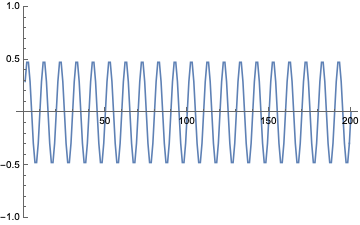

In [5]:
ListPlot[a2,Joined->True,PlotRange->{-1,1}]

In [6]:
c=a1+a2;

In [7]:
Export["~/ssa_20211008/graph3.csv",c,"CSV"]

~/ssa_20211008/graph3.csv

-Graphics-
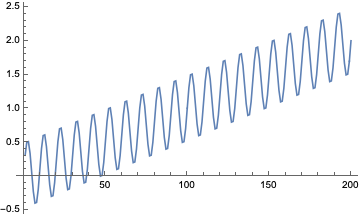

In [8]:
ListPlot[c,Joined->True]

In [9]:
 m=Length[c]

200

In [10]:
n=Floor[m/2]

100

In [11]:
x=N[Table[c[[i+j-1]],{i,m-n+1},{j,n}]];

In [12]:
Dimensions[x]

{101, 100}

SingularValueDecomposition[m] gives the singular value decomposition for a numerical\
 
>     matrix m as a list of matrices {u, σ, v}
 
>     , where σ is a diagonal matrix and m
 
>        can be written as u . σ . ConjugateTranspose[v]
 
>        . SingularValueDecomposition[{m, a}]

 
>          gives the generalized singular value decomposition of m
 
>           with respect to a. SingularValueDecomposition[m, k]

 
>             gives the singular value decomposition associated with the k
 
>              largest singular values of m
 
>              . SingularValueDecomposition[m, UpTo[k]]

 
>                gives the decomposition for the k
 
>                 largest singular values, or as many as are available. 


Attributes[SingularValueDecomposition]={Protected}


Options[SingularValueDecomposition]=
 
>   {Cubics -> False, Method -> Automatic, Quartics -> False, Tolerance -> Automatic}
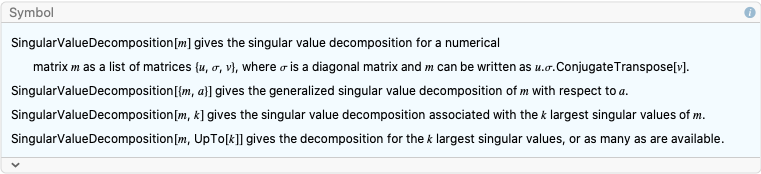

In [13]:
?SingularValueDecomposition

In [14]:
uu=SingularValueDecomposition[x];

In [15]:
Dimensions[uu]

{3}

In [16]:
u=uu[[1]];

In [17]:
 w=uu[[2]];

In [18]:
v=uu[[3]];

In [19]:
Dimensions[u]

{101, 101}

In [20]:
Dimensions[w]

{101, 100}

In [21]:
Dimensions[v]

{100, 100}

-Graphics-
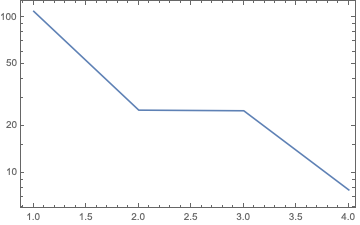

In [22]:
ListLogPlot[Table[w[[i,i]],{i,n}],Joined->True,PlotRange->All,Axes->False,Frame->True]

In [23]:
sn[xx_]:=Module[{i,j,k,n,n1,x,sum},x={};
{n1,n}=Dimensions[xx];

ToExpression::sntxi: Incomplete expression; more input is needed .


$Failed

In [23]:
sn[xx_]:=Module[{i,j,k,n,n1,x,sum},x={};
{n1,n}=Dimensions[xx];
j=0;sum=0;
Do[Do[If[k<=n,sum=sum+xx[[i-k+1,k]];j=j+1],{k,i}];
x=Append[x,sum/j];sum=0;j=0,{i,n1}];
j=0;sum=0;
     Do[Do[If[k<=n1,sum=sum+xx[[n1-k+1,k+i-1]];j=j+1],{k,n-i+1}];
x=Append[x,sum/j];sum=0;j=0,{i,2,n}];
Return[x]]

In [24]:
xx=Sum[w[[i,i]]Outer[Times,Transpose[u][[i]],Transpose[v][[i]]],{i,1}];

In [25]:
y1=sn[xx];

-Graphics-
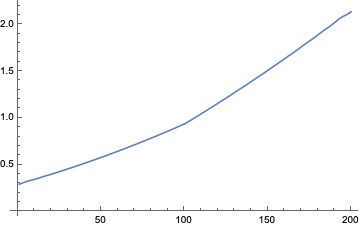

In [26]:
ListPlot[y1,Joined->True,PlotRange->All]

In [27]:
xx=Sum[w[[i,i]]Outer[Times,Transpose[u][[i]],Transpose[v][[i]]],{i,3}];

In [28]:
y1=sn[xx];

-Graphics-
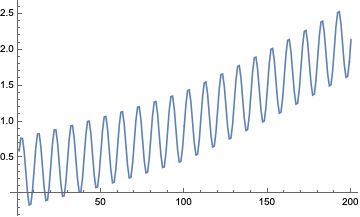

In [29]:
ListPlot[y1,Joined->True]

In [30]:
xx=Sum[w[[i,i]]Outer[Times,Transpose[u][[i]],Transpose[v][[i]]],{i,2,40}];

In [31]:
y1=sn[xx];

-Graphics-
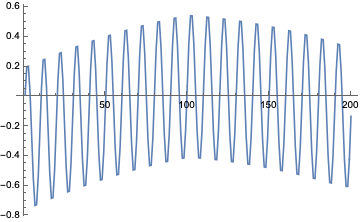

In [32]:
ListPlot[y1,Joined->True]